In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #Focused Algorithm
import statsmodels.api as sm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('**************************************************************************************')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
**************************************************************************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
**************************************************************************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
**************************************************************************************
no     44396
yes      815
Name: default, dtype: int64
**************************************************************************************
yes    25130
no     20081
Name: housing, dtype: int64
********************************************************************

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df['pdays'].nunique()

559

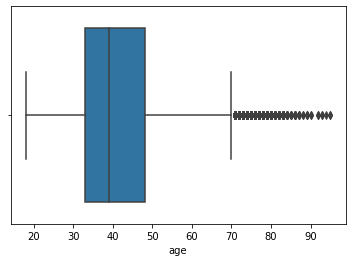

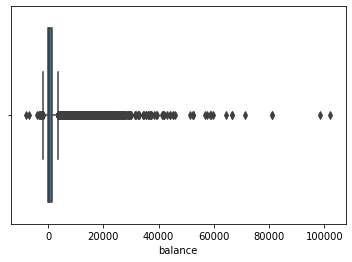

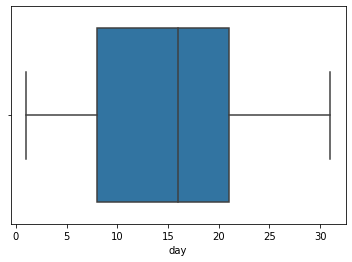

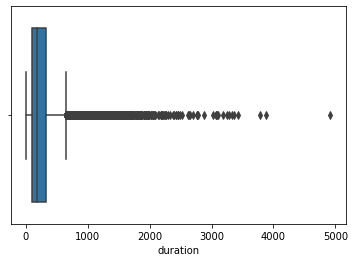

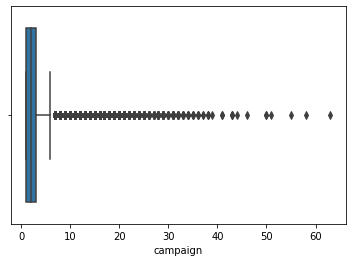

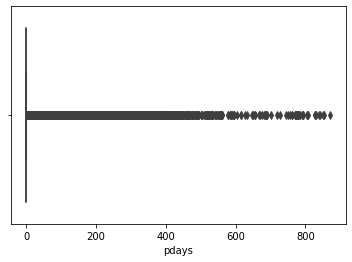

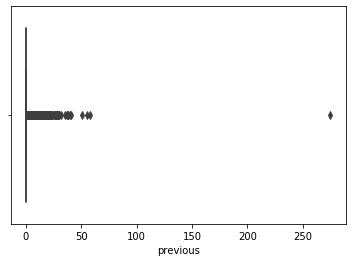

In [9]:
for i in df.iloc[:,:-1].columns:
    if df[i].dtype != 'object':
        sns.boxplot(i, data = df)
        plt.show()

From the above boxplots we can conclude that in columns age, default, balance, loan, duration, campaign, pdays, previous in these all we have outliers.

In [10]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [12]:
df['Target'] = np.where(df['y'] == 'yes',1,0)

In [13]:
df['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [14]:
df['Target'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Target, dtype: float64

In [15]:
df.drop(['y'], axis=1, inplace=True)

In [16]:
df['default'] = np.where(df['default'] == 'yes',1,0)

In [17]:
df['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [18]:
df['housing'] = np.where(df['housing'] == 'no',1,0)

In [19]:
df['loan'] = np.where(df['loan'] == 'yes',1,0)

In [20]:
month_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_num)

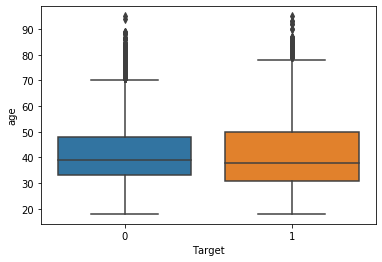

In [21]:
sns.boxplot(x='Target',y='age',data=df)
plt.show()

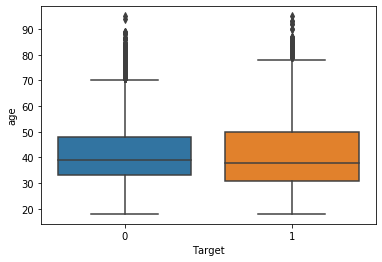

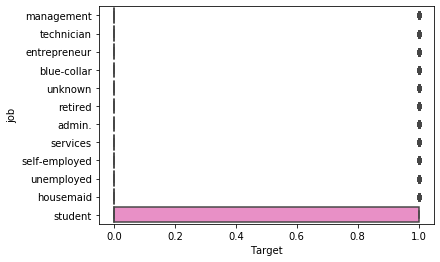

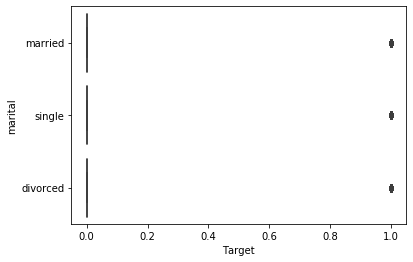

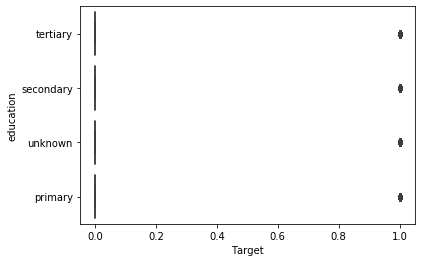

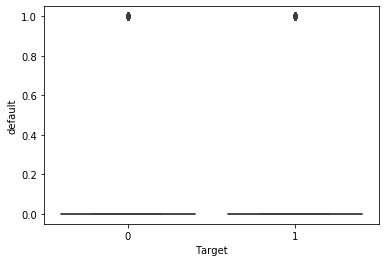

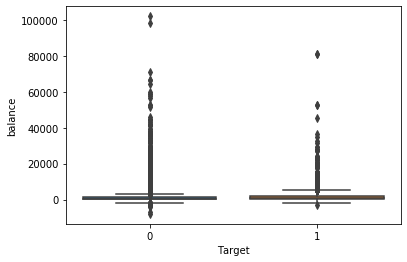

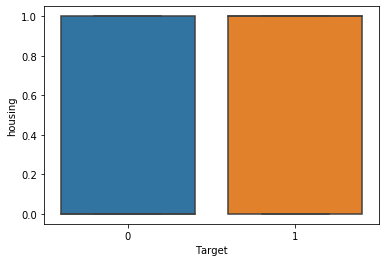

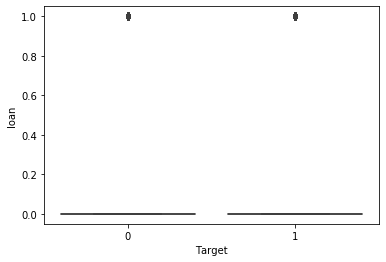

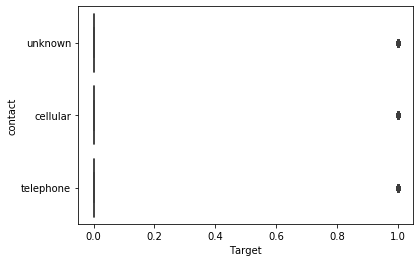

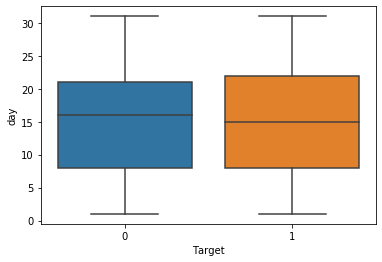

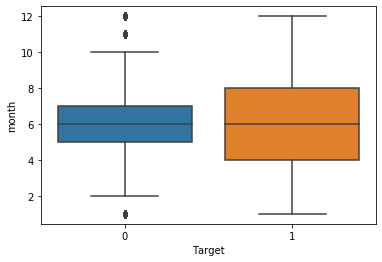

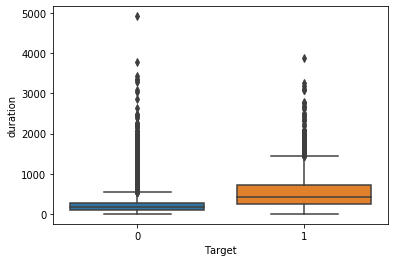

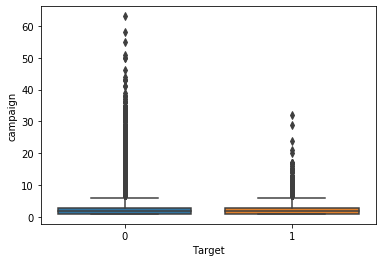

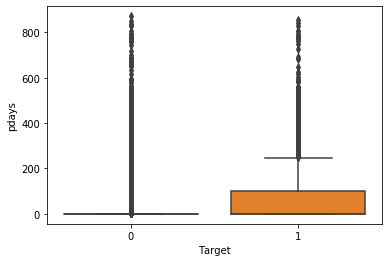

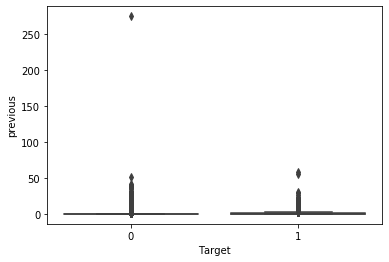

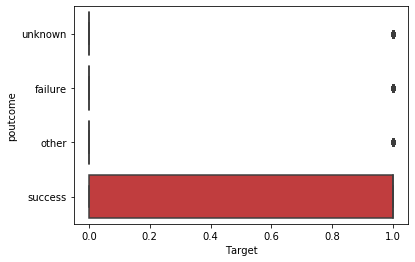

In [22]:
for i in df.iloc[:,:-1].columns:
    sns.boxplot(x='Target',y=i,data=df)
    plt.show()

In [23]:
ct = pd.crosstab(index=df['job'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')
ct.T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
0,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
1,631,708,123,109,1301,516,187,369,269,840,202,34


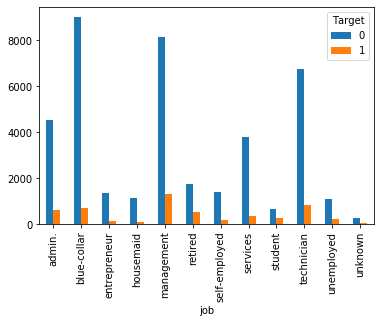

In [24]:
ct.plot(kind='bar')

In [25]:
ct = pd.crosstab(index=df['marital'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')
ct.T

marital,divorced,married,single
Target,,,
0,4585,24459,10878
1,622,2755,1912


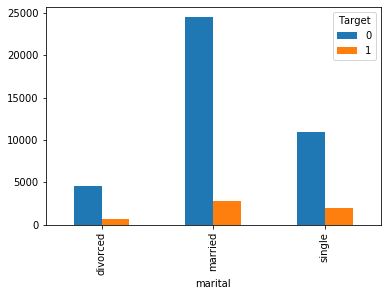

In [26]:
ct.plot(kind='bar')

In [27]:
ct = pd.crosstab(index=df['education'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')
ct.T

education,primary,secondary,tertiary,unknown
Target,,,,
0,6260,20752,11305,1605
1,591,2450,1996,252


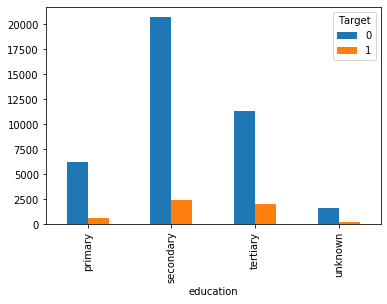

In [28]:
ct.plot(kind='bar')

In [29]:
ct = pd.crosstab(index=df['default'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')
ct.T

default,0,1
Target,,
0,39159,763
1,5237,52


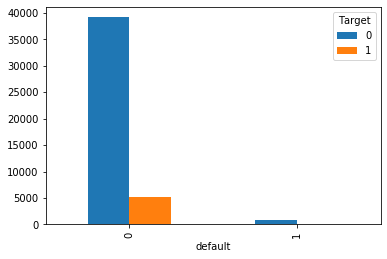

In [30]:
ct.plot(kind='bar')

In [31]:
ct = pd.crosstab(index=df['loan'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')
ct.T

loan,0,1
Target,,
0,33162,6760
1,4805,484


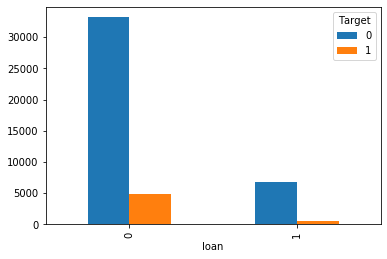

In [32]:
ct.plot(kind='bar')

In [33]:
ct = pd.crosstab(index=df['contact'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')
ct.T

contact,cellular,telephone,unknown
Target,,,
0,24916,2516,12490
1,4369,390,530


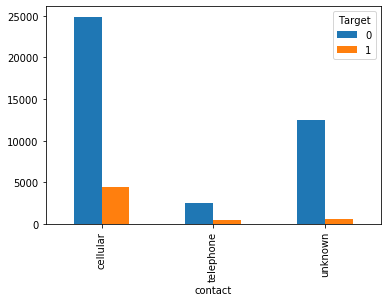

In [34]:
ct.plot(kind='bar')

In [35]:
ct = pd.crosstab(index=df['month'],
           columns=df['Target'],
           values = df['Target'],
           aggfunc='count')
ct.T

month,1,2,3,4,5,6,7,8,9,10,11,12
Target,,,,,,,,,,,,
0,1261,2208,229,2355,12841,4795,6268,5559,310,415,3567,114
1,142,441,248,577,925,546,627,688,269,323,403,100


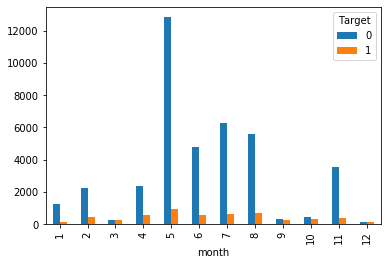

In [36]:
ct.plot(kind='bar')

In [37]:
def outliers_to_median_values(dframe,column_name):
    
    Q1 = dframe[column_name].quantile(0.25)
    Q3 = dframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dframe[(dframe[column_name] < lower_bound) | (dframe[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = dframe[(dframe[column_name] >= lower_bound) & (dframe[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    dframe.loc[(dframe[column_name] < lower_bound) | (dframe[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=dframe)
    plt.show()

Distribution after outlier removal


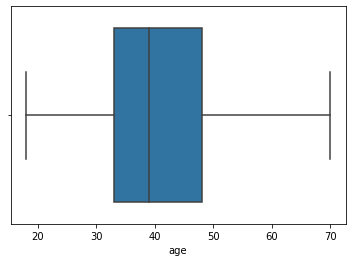

In [38]:
outliers_to_median_values(df ,'age')

Distribution after outlier removal


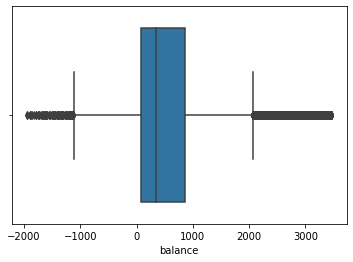

In [39]:
outliers_to_median_values(df,'balance')

Distribution after outlier removal


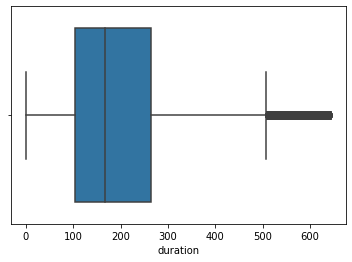

In [40]:
outliers_to_median_values(df,'duration')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int64  
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  Target     45211 non-null  int32  
dtypes: float64(3), int32(4), int64(5), object(5)
memory usage: 5.2+ MB


In [42]:
X = df.drop(['Target'], axis=1)
y = df[['Target']]

In [43]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,management,married,tertiary,0,2143.0,0,0,unknown,5,5,261.0,1,-1,0,unknown
1,44.0,technician,single,secondary,0,29.0,0,0,unknown,5,5,151.0,1,-1,0,unknown
2,33.0,entrepreneur,married,secondary,0,2.0,0,1,unknown,5,5,76.0,1,-1,0,unknown
3,47.0,blue-collar,married,unknown,0,1506.0,0,0,unknown,5,5,92.0,1,-1,0,unknown
4,33.0,unknown,single,unknown,0,1.0,1,0,unknown,5,5,198.0,1,-1,0,unknown


In [44]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [45]:
X = pd.get_dummies(X, drop_first=True)

In [46]:
X.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,0,2143.0,0,0,5,5,261.0,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44.0,0,29.0,0,0,5,5,151.0,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33.0,0,2.0,0,1,5,5,76.0,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47.0,0,1506.0,0,0,5,5,92.0,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33.0,0,1.0,1,0,5,5,198.0,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [47]:
import statsmodels.formula.api as SM

In [48]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula='y~x', data=x_vars).fit().rsquared
        vif = round(1/(1-rsq), 2)
        print(xvar_names[i], ' VIF = ',vif)

In [49]:
vif_cal(X)

age  VIF =  1.48
default  VIF =  1.02
balance  VIF =  1.04
housing  VIF =  1.21
loan  VIF =  1.03
day  VIF =  1.05
month  VIF =  1.11
duration  VIF =  1.03
campaign  VIF =  1.07
pdays  VIF =  4.52
previous  VIF =  1.41
job_blue-collar  VIF =  2.5
job_entrepreneur  VIF =  1.3
job_housemaid  VIF =  1.29
job_management  VIF =  3.02
job_retired  VIF =  1.56
job_self-employed  VIF =  1.32
job_services  VIF =  1.65
job_student  VIF =  1.25
job_technician  VIF =  2.09
job_unemployed  VIF =  1.24
job_unknown  VIF =  1.09
marital_married  VIF =  2.53
marital_single  VIF =  2.86
education_secondary  VIF =  2.59
education_tertiary  VIF =  3.37
education_unknown  VIF =  1.3
contact_telephone  VIF =  1.07
contact_unknown  VIF =  1.26
poutcome_other  VIF =  1.34
poutcome_success  VIF =  1.38
poutcome_unknown  VIF =  5.97


In [50]:
logreg = sm.Logit(y, sm.add_constant(X))
lg = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.295209
         Iterations 7


In [51]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45178
Method:                           MLE   Df Model:                           32
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.1820
Time:                        20:44:45   Log-Likelihood:                -13347.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.6073      0.156    -16.695      0.000      -2.913      -2.301
age                    -0.0053      0.002     -2.725      0.006      -0.009      -0.001
default         

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

In [55]:
X_train.shape

(30291, 32)

In [56]:
y_train.shape

(30291, 1)

In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_train_pred = model.predict(X_train)

In [60]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
metrics.accuracy_score(y_train, y_train_pred)

0.8930705490079561

In [62]:
y_test_pred = model.predict(X_test)

In [63]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
metrics.accuracy_score(y_test, y_test_pred)

0.8966487935656836

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [66]:
confusion_matrix(y_train, y_train_pred)

array([[26440,   307],
       [ 2932,   612]], dtype=int64)

In [67]:
confusion_matrix(y_test, y_test_pred)

array([[13024,   151],
       [ 1391,   354]], dtype=int64)

In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

In [69]:
print(tn, fp, fn, tp)

13024 151 1391 354


In [70]:
recall_score(y_test, y_test_pred)

0.202865329512894

In [71]:
precision_score(y_test, y_test_pred)

0.700990099009901

In [72]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13175
           1       0.70      0.20      0.31      1745

    accuracy                           0.90     14920
   macro avg       0.80      0.60      0.63     14920
weighted avg       0.88      0.90      0.87     14920



In [73]:
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 1 ... 0 0 0]


In [74]:
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob)

[[0.94145289 0.05854711]
 [0.92067071 0.07932929]
 [0.40420828 0.59579172]
 ...
 [0.88455524 0.11544476]
 [0.97602264 0.02397736]
 [0.75831565 0.24168435]]


In [75]:
y_pred_prob = model.predict_proba(X_test)
print(np.round(y_pred_prob,2))

[[0.94 0.06]
 [0.92 0.08]
 [0.4  0.6 ]
 ...
 [0.88 0.12]
 [0.98 0.02]
 [0.76 0.24]]


In [76]:
y_pred = model.predict(X_scaled)

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0, 0.5, 'True Positive Rate')

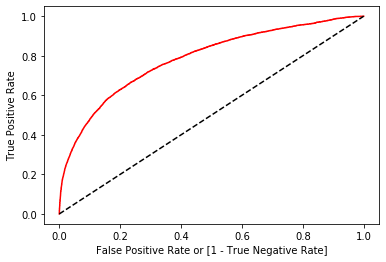

In [78]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X_scaled)[:,1])

auc = roc_auc_score(y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [79]:
auc

0.5855854253286819

In [80]:
# AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_test_pred)
logit_roc_auc

0.595702114471817

In [81]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
print(fpr, tpr, threshold)

[0.        0.0114611 1.       ] [0.         0.20286533 1.        ] [2 1 0]


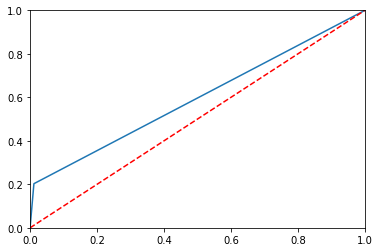

In [82]:
# Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

In [83]:
# Predict the probability value for X
pred_proba_df = pd.DataFrame(y_pred_prob)
pred_proba_df

,0,1
0,0.941453,0.058547
1,0.920671,0.079329
2,0.404208,0.595792
3,0.930113,0.069887
4,0.965484,0.034516
...,...,...
14915,0.819925,0.180075
14916,0.979763,0.020237
14917,0.884555,0.115445
14918,0.976023,0.023977


In [84]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[13024   151]
 [ 1391   354]]


In [85]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13175
           1       0.70      0.20      0.31      1745

    accuracy                           0.90     14920
   macro avg       0.80      0.60      0.63     14920
weighted avg       0.88      0.90      0.87     14920




*********For i = 0.2 **********
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     13175
           1       0.39      0.49      0.43      1745

    accuracy                           0.85     14920
   macro avg       0.66      0.69      0.67     14920
weighted avg       0.87      0.85      0.86     14920



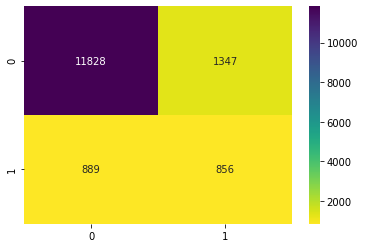

                                      

*********For i = 0.3 **********
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     13175
           1       0.51      0.33      0.40      1745

    accuracy                           0.88     14920
   macro avg       0.71      0.64      0.67     14920
weighted avg       0.87      0.88      0.87     14920



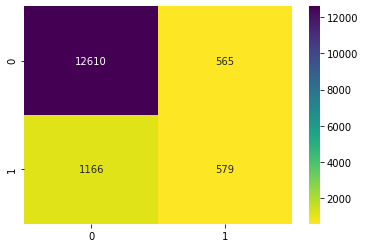

                                      

*********For i = 0.4 **********
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     13175
           1       0.62      0.25      0.36      1745

    accuracy                           0.89     14920
   macro avg       0.76      0.62      0.65     14920
weighted avg       0.87      0.89      0.87     14920



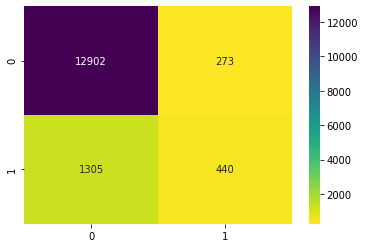

                                      

*********For i = 0.5 **********
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13175
           1       0.70      0.20      0.31      1745

    accuracy                           0.90     14920
   macro avg       0.80      0.60      0.63     14920
weighted avg       0.88      0.90      0.87     14920



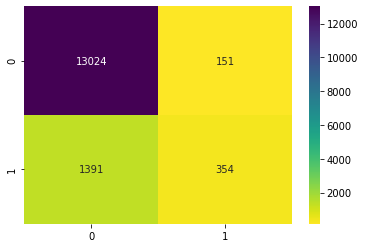

                                      

*********For i = 0.6 **********
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13175
           1       0.76      0.15      0.25      1745

    accuracy                           0.89     14920
   macro avg       0.83      0.57      0.60     14920
weighted avg       0.88      0.89      0.86     14920



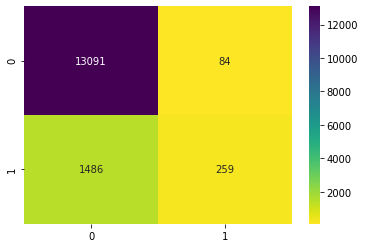

                                      

*********For i = 0.7 **********
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13175
           1       0.76      0.09      0.16      1745

    accuracy                           0.89     14920
   macro avg       0.83      0.54      0.55     14920
weighted avg       0.88      0.89      0.85     14920



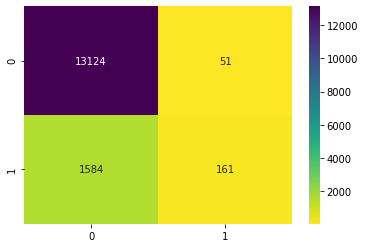

                                      

*********For i = 0.8 **********
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13175
           1       0.81      0.04      0.07      1745

    accuracy                           0.89     14920
   macro avg       0.85      0.52      0.51     14920
weighted avg       0.88      0.89      0.84     14920



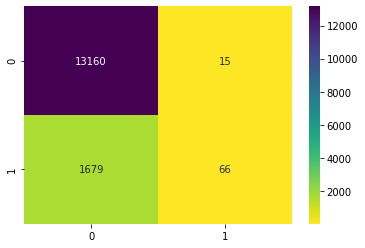

In [86]:
# Use cut-off value to predict the recall_score and accuracy_score.
cutoff_list = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for i in cutoff_list:
    print('\n*********For i = {} **********'.format(i))
    y_pred = pd.DataFrame(np.where(pred_proba_df.iloc[:, 1:2] > i, 1, 0))
    test_recall_score = metrics.recall_score(y_test, y_pred)
    test_auc_score = metrics.roc_auc_score(y_test, y_pred)
    test_precision_score = metrics.precision_score(y_test, y_pred)
    print(metrics.classification_report(y_test, y_pred))
    sns.heatmap((metrics.confusion_matrix(y_test, y_pred)), annot=True, fmt='.5g', cmap='viridis_r')
    plt.show()
    print("                                      ")